In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Data Preparation

In [2]:
artists_df = pd.read_csv('archive/spotify_daily_charts_artists.csv')
artists_df.head()

,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7279217,"['pop', 'talent show', 'uk pop']",86
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,17241689,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",85
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,28845735,"['pop', 'pop rock']",88
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,6407022,"['dance pop', 'pop', 'pop dance', 'post-teen p...",78


In [3]:
charts_df = pd.read_csv('archive/spotify_daily_charts.csv')
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [4]:
tracks_df = pd.read_csv('archive/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,2,-6.209,1,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,88,0.358,0.557,10,-7.398,1,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,87,0.748,0.524,8,-5.599,1,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,0,-8.821,1,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,1,0.783,0.623,7,-6.126,1,0.0800,0.338,0.00000,0.0975,0.447,100.048


Merge datasets into a master data

In [5]:
df = charts_df.merge(tracks_df, on='track_id', how='left')

In [6]:
df_all = df.merge(artists_df, on='artist_id', how='left')
df_all.head()

,date,position,track_id,track_name_x,artist,streams,track_name_y,artist_id,artist_name_x,album_id,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name_y,total_followers,genres,popularity_y
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,...,0.0454,0.196,0.00000,0.0830,0.301,174.152,Bruno Mars,28322108,"['dance pop', 'pop']",88
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,...,0.0590,0.695,0.00000,0.0902,0.494,85.043,James Arthur,7279217,"['pop', 'talent show', 'uk pop']",86
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,...,0.0338,0.414,0.00000,0.1110,0.661,95.010,The Chainsmokers,17241689,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",85
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,...,0.0307,0.097,0.00272,0.1150,0.296,90.000,The Chainsmokers,17241689,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",85
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,...,0.0800,0.338,0.00000,0.0975,0.447,100.048,Maroon 5,28845735,"['pop', 'pop rock']",88


In [7]:
df_all['duration_mins']=df_all['duration']/60000
df_all['date'] = pd.to_datetime(df_all['date'])

In [8]:
df_all.columns

Index(['date', 'position', 'track_id', 'track_name_x', 'artist', 'streams',
       'track_name_y', 'artist_id', 'artist_name_x', 'album_id', 'duration',
       'release_date', 'popularity_x', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'artist_name_y', 'total_followers',
       'genres', 'popularity_y', 'duration_mins'],
      dtype='object')

Drop duplicate columns

In [9]:
df_all.drop(['track_name_y','artist_name_y','popularity_y','artist_name_x'],axis=1,inplace=True)

In [10]:
df_all = df_all.rename(columns={'track_name_x': 'track_name', 'popularity_x': 'popularity'})

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294600 entries, 0 to 294599
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              294600 non-null  datetime64[ns]
 1   position          294600 non-null  int64         
 2   track_id          294600 non-null  object        
 3   track_name        294590 non-null  object        
 4   artist            294590 non-null  object        
 5   streams           294600 non-null  int64         
 6   artist_id         294600 non-null  object        
 7   album_id          294600 non-null  object        
 8   duration          294600 non-null  int64         
 9   release_date      294600 non-null  object        
 10  popularity        294600 non-null  int64         
 11  danceability      294600 non-null  float64       
 12  energy            294600 non-null  float64       
 13  key               294600 non-null  int64         
 14  loud

# EDA

Filter dataset to 'k-pop girl group' genre

In [12]:
df_kpopg = df_all[df_all['genres']=="['k-pop', 'k-pop girl group']"]

In [13]:
df_kpopg['artist'].unique()

array(['BLACKPINK', 'Red Velvet', "Girls' Generation-TTS", 'MOMOLAND',
       'TWICE', "Girls' Generation-Oh!GG", 'IZ*ONE', 'ITZY', 'EVERGLOW',
       'MAMAMOO', '(G)I-DLE', 'GFRIEND'], dtype=object)

In [14]:
df_kpopg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 33969 to 294585
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              7605 non-null   datetime64[ns]
 1   position          7605 non-null   int64         
 2   track_id          7605 non-null   object        
 3   track_name        7605 non-null   object        
 4   artist            7605 non-null   object        
 5   streams           7605 non-null   int64         
 6   artist_id         7605 non-null   object        
 7   album_id          7605 non-null   object        
 8   duration          7605 non-null   int64         
 9   release_date      7605 non-null   object        
 10  popularity        7605 non-null   int64         
 11  danceability      7605 non-null   float64       
 12  energy            7605 non-null   float64       
 13  key               7605 non-null   int64         
 14  loudness          

In [40]:
df_kpopg.head()

,date,position,track_id,track_name,artist,streams,artist_id,album_id,duration,release_date,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres,duration_mins
0,2017-06-22,170,7LJjWqhqK594nN7qJzLVXE,As If It's Your Last,BLACKPINK,20849,41MozSoPIsD1dJM0CLPjZF,3nvfNC0tnGcFXGHrJpqQ6m,213264,2017-06-22,...,1,0.0816,0.0688,0.0,0.0759,0.45,125.034,18224049,"['k-pop', 'k-pop girl group']",3.5544
1,2017-06-23,61,7LJjWqhqK594nN7qJzLVXE,As If It's Your Last,BLACKPINK,44955,41MozSoPIsD1dJM0CLPjZF,3nvfNC0tnGcFXGHrJpqQ6m,213264,2017-06-22,...,1,0.0816,0.0688,0.0,0.0759,0.45,125.034,18224049,"['k-pop', 'k-pop girl group']",3.5544
2,2017-06-24,58,7LJjWqhqK594nN7qJzLVXE,As If It's Your Last,BLACKPINK,46229,41MozSoPIsD1dJM0CLPjZF,3nvfNC0tnGcFXGHrJpqQ6m,213264,2017-06-22,...,1,0.0816,0.0688,0.0,0.0759,0.45,125.034,18224049,"['k-pop', 'k-pop girl group']",3.5544
3,2017-06-25,53,7LJjWqhqK594nN7qJzLVXE,As If It's Your Last,BLACKPINK,45742,41MozSoPIsD1dJM0CLPjZF,3nvfNC0tnGcFXGHrJpqQ6m,213264,2017-06-22,...,1,0.0816,0.0688,0.0,0.0759,0.45,125.034,18224049,"['k-pop', 'k-pop girl group']",3.5544
4,2017-06-26,53,7LJjWqhqK594nN7qJzLVXE,As If It's Your Last,BLACKPINK,49908,41MozSoPIsD1dJM0CLPjZF,3nvfNC0tnGcFXGHrJpqQ6m,213264,2017-06-22,...,1,0.0816,0.0688,0.0,0.0759,0.45,125.034,18224049,"['k-pop', 'k-pop girl group']",3.5544


Check top streamed k-pop girl group

In [20]:
top5 = df_kpopg.groupby('artist')[['streams']].sum().sort_values(by="streams", ascending=False).head(5)

In [21]:
top5

,streams
artist,
BLACKPINK,253291272
TWICE,82087777
MOMOLAND,33615507
Red Velvet,25076051
ITZY,22997615


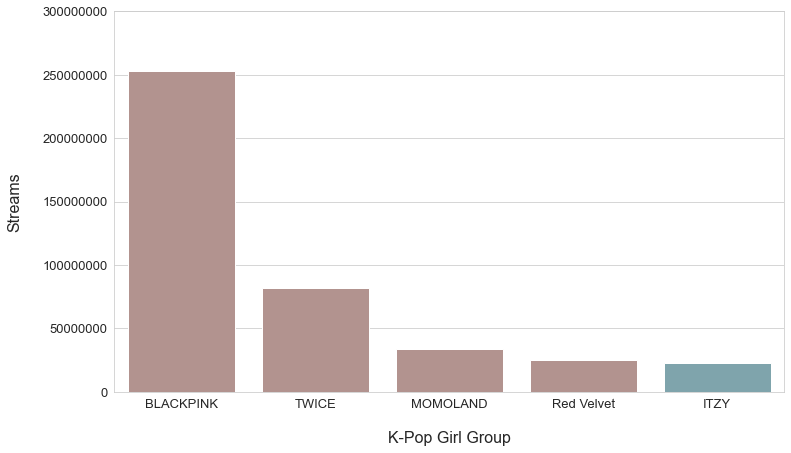

In [49]:
### mycolors = ["#b88f89", "#b88f89","#b88f89", "#b88f89", "#77a9b4"]
sns.set_palette(sns.color_palette(mycolors))
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
fig = sns.barplot(x=top5.index, y=top5.streams, data=top5)
fig.set_title('Top 5 Most Streamed K-Pop Girl Groups (Streams for Charting Songs)', fontsize=17,y=1.02,fontweight='bold')
plt.ylabel("Streams",fontsize=16, labelpad=20)
plt.xlabel("K-Pop Girl Group",fontsize=16, labelpad=20)
plt.ticklabel_format(axis='y', style='plain')
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.ylim([0,300000000])
plt.savefig('top5_kpopgirlgroup.png', bbox_inches='tight')

In [50]:
top4 = df_kpopg[(df_kpopg['artist']=="Red Velvet") | (df_kpopg['artist']=="MOMOLAND") | (df_kpopg['artist']=="TWICE") | (df_kpopg['artist']=="BLACKPINK")]

In [51]:
top4['release_date'] = pd.to_datetime(top4['release_date'])

<ipython-input-51-e52ba965cd00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top4['release_date'] = pd.to_datetime(top4['release_date'])


In [27]:
bp = df_kpopg[df_kpopg['artist']=="BLACKPINK"]

bp = bp['album_id'].unique().tolist()

In [28]:
bp

['3nvfNC0tnGcFXGHrJpqQ6m',
 '6IzQb2kLydYNfzmKXvmndX',
 '1HwIUaaEuRsxsIyssqtGLH',
 '3KacwE6ax8jp1vun6DQ1Jf',
 '4l87mak80qeOiZwXM5bRuM',
 '2zwfcNqJe7IT1RwgVyv1ug',
 '71QEBJY33oG0l5rqs2kR1c',
 '3ToMjZ40PPqL5NV83xOoOM',
 '4xVAKfdoqtrlwl9m7REmdL',
 '7viSsSKXrDa95CtUcuc1Iv',
 '1AkGUEtocePYti6xefsECx',
 '19LMUlWN7xU2NW80pZSeuH',
 '2VBb4LRcRSACOfJWRUgVZl',
 '71O60S5gIJSIAhdnrDIh3N',
 '7ikmjsvRzDRzxHN0KXSQdv']

In [53]:
#Remove duplicates
top_album = top4.drop_duplicates(subset = ["album_id"])

In [54]:
top_album['artist'].value_counts()

TWICE         17
BLACKPINK     15
Red Velvet     8
MOMOLAND       3
Name: artist, dtype: int64

In [55]:
release = top_album.groupby(["release_date","artist"])["album_id"].size().to_frame().reset_index().set_index("release_date")

In [57]:
release[release["artist"]=="BLACKPINK"]

,artist,album_id
release_date,,
2017-06-22,BLACKPINK,3
2017-07-20,BLACKPINK,2
2018-06-15,BLACKPINK,3
2019-04-04,BLACKPINK,2
2019-04-05,BLACKPINK,1
2020-06-26,BLACKPINK,2
2020-08-28,BLACKPINK,1
2020-10-02,BLACKPINK,1


In [60]:
release[release["artist"]=="TWICE"]

,artist,album_id
release_date,,
2018-04-09,TWICE,1
2018-07-09,TWICE,2
2018-11-05,TWICE,1
2019-04-22,TWICE,2
2019-09-23,TWICE,2
2020-06-01,TWICE,2
2020-08-21,TWICE,2
2020-10-26,TWICE,2
2020-11-30,TWICE,1


In [61]:
release[release["artist"]=="Red Velvet"]

,artist,album_id
release_date,,
2017-11-17,Red Velvet,1
2018-01-29,Red Velvet,1
2018-08-06,Red Velvet,1
2018-11-30,Red Velvet,1
2019-06-19,Red Velvet,1
2019-08-20,Red Velvet,1
2019-12-23,Red Velvet,1
2020-10-17,Red Velvet,1


In [62]:
release[release["artist"]=="MOMOLAND"]

,artist,album_id
release_date,,
2018-01-03,MOMOLAND,1
2018-02-14,MOMOLAND,1
2018-06-26,MOMOLAND,1


# STL of streams for the K-Pop Girl Group genre

In [25]:
import statsmodels.api as sm

In [15]:
#get all dates
data1 = pd.DataFrame({'date':pd.unique(df_kpopg['date'])}).set_index('date').asfreq('d')

In [16]:
data1.head()

""
date
2017-06-22
2017-06-23
2017-06-24
2017-06-25
2017-06-26


In [17]:
#get total streams of all charting kpop girl group songs per month
kpop_streams = df_kpopg.groupby('date')[['streams']].sum()

In [18]:
kpop_streams.head()

,streams
date,
2017-06-22,20849
2017-06-23,44955
2017-06-24,46229
2017-06-25,45742
2017-06-26,49908


In [19]:
#merge with complete dates
data1['streams']=kpop_streams

In [20]:
data1.head()

,streams
date,
2017-06-22,20849.0
2017-06-23,44955.0
2017-06-24,46229.0
2017-06-25,45742.0
2017-06-26,49908.0


In [21]:
#fill days with no streams with 0
data1['streams']=data1['streams'].fillna(0)

In [22]:
data1.head()

,streams
date,
2017-06-22,20849.0
2017-06-23,44955.0
2017-06-24,46229.0
2017-06-25,45742.0
2017-06-26,49908.0


<AxesSubplot:xlabel='date'>

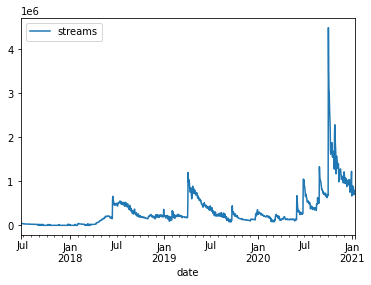

In [23]:
data1.plot()

AttributeError: 'DecomposeResult' object has no attribute 'tight_layout'

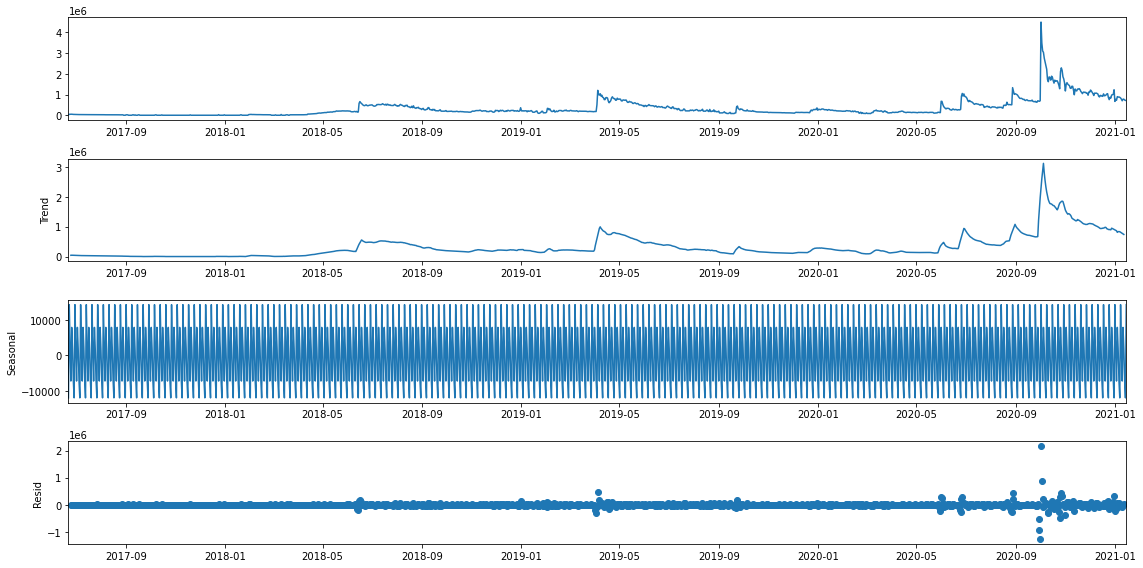

In [35]:
res = sm.tsa.seasonal_decompose(data1)
resplot = res.plot()
res.tight_layout(pad=1.0)

<AxesSubplot:xlabel='date'>

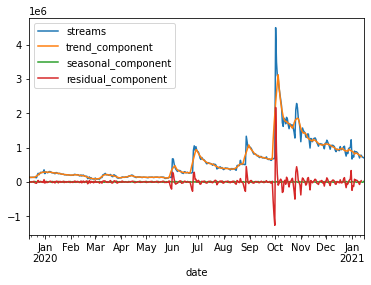

In [29]:
#get each component 
data_decomposed = data1.copy()
data_decomposed['trend_component'] = res.trend
data_decomposed['seasonal_component'] = res.seasonal
data_decomposed['residual_component'] = res.resid

data_decomposed.tail(400).plot()

In [59]:
top5_kpopg = df_kpopg[(df_kpopg['artist']=="Red Velvet") | (df_kpopg['artist']=="MOMOLAND") | (df_kpopg['artist']=="TWICE") | (df_kpopg['artist']=="BLACKPINK") | (df_kpopg['artist']=="ITZY")]

In [60]:
top5_kpopg['artist'].unique()

array(['BLACKPINK', 'Red Velvet', 'MOMOLAND', 'TWICE', 'ITZY'],
      dtype=object)

In [64]:
top5_kpopg.columns

Index(['date', 'position', 'track_id', 'track_name', 'artist', 'streams',
       'artist_id', 'album_id', 'duration', 'release_date', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'total_followers', 'genres', 'duration_mins'],
      dtype='object')

danceability, energy, loudness, valence

In [72]:
#get relevant columns

songchar = top5_kpopg[['artist','track_id','danceability','valence','energy','loudness']]

In [85]:
danceability = songchar.groupby(['artist'])['danceability'].agg('mean').to_frame()

In [86]:
energy = songchar.groupby(['artist'])['energy'].agg('mean').to_frame()

In [87]:
loudness = songchar.groupby(['artist'])['loudness'].agg('mean').to_frame()

In [88]:
valence = songchar.groupby(['artist'])['valence'].agg('mean').to_frame()

In [89]:
char = pd.concat([danceability, energy, loudness, valence], axis = 1, sort=False)

In [91]:
char = char.reset_index()

In [92]:
char

,artist,danceability,energy,loudness,valence
0,BLACKPINK,0.707063,0.806855,-3.743387,0.491147
1,ITZY,0.794888,0.899041,-3.936411,0.643892
2,MOMOLAND,0.760563,0.823660,-3.465364,0.862168
3,Red Velvet,0.677476,0.713703,-2.575838,0.464818
4,TWICE,0.688439,0.892673,-2.368537,0.678362


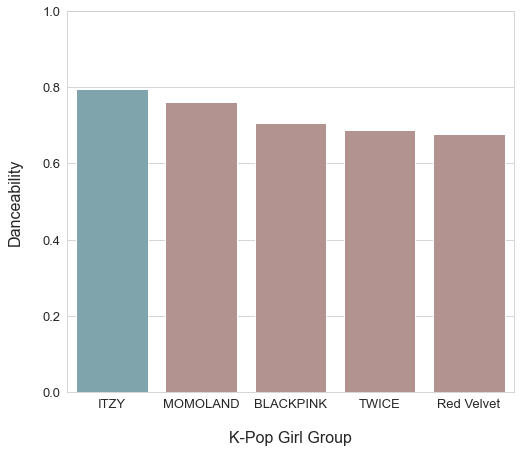

In [110]:
mycolors = ["#77a9b4", "#b88f89","#b88f89", "#b88f89", "#b88f89"]
sns.set_palette(sns.color_palette(mycolors))
sns.set_style("whitegrid")

dance_data = char[['artist','danceability']].sort_values(by="danceability", ascending=False)

plt.figure(figsize=(8, 7))
fig = sns.barplot(x='artist', y='danceability', data=dance_data)
fig.set_title('Danceability of Charting Songs', fontsize=17,y=1.02,fontweight='bold')
plt.ylabel("Danceability",fontsize=16, labelpad=20)
plt.xlabel("K-Pop Girl Group",fontsize=16, labelpad=20)
plt.ticklabel_format(axis='y', style='plain')
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.ylim([0,1])
plt.savefig('danceability.png', bbox_inches='tight')

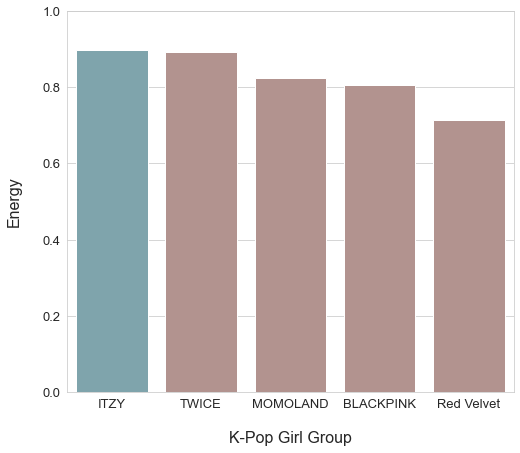

In [111]:
mycolors = ["#77a9b4", "#b88f89","#b88f89", "#b88f89", "#b88f89"]
sns.set_palette(sns.color_palette(mycolors))
sns.set_style("whitegrid")

energy_data = char[['artist','energy']].sort_values(by="energy", ascending=False)

plt.figure(figsize=(8, 7))
fig = sns.barplot(x='artist', y='energy', data=energy_data)
fig.set_title('Energy of Charting Songs', fontsize=17,y=1.02,fontweight='bold')
plt.ylabel("Energy",fontsize=16, labelpad=20)
plt.xlabel("K-Pop Girl Group",fontsize=16, labelpad=20)
plt.ticklabel_format(axis='y', style='plain')
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.ylim([0,1])
plt.savefig('energy.png', bbox_inches='tight')

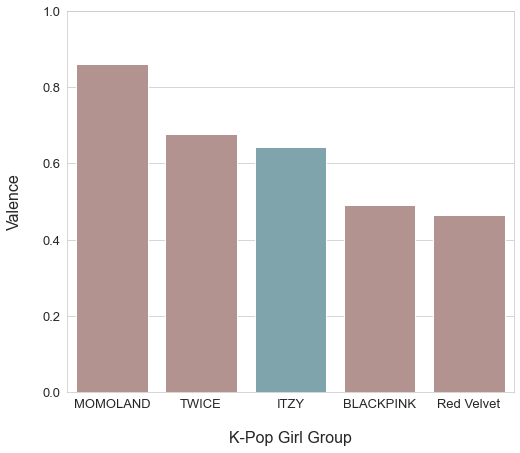

In [113]:
mycolors = ["#b88f89", "#b88f89","#77a9b4", "#b88f89", "#b88f89"]
sns.set_palette(sns.color_palette(mycolors))
sns.set_style("whitegrid")

val_data = char[['artist','valence']].sort_values(by="valence", ascending=False)

plt.figure(figsize=(8, 7))
fig = sns.barplot(x='artist', y='valence', data=val_data)
fig.set_title('Valence of Charting Songs', fontsize=17,y=1.02,fontweight='bold')
plt.ylabel("Valence",fontsize=16, labelpad=20)
plt.xlabel("K-Pop Girl Group",fontsize=16, labelpad=20)
plt.ticklabel_format(axis='y', style='plain')
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.ylim([0,1])
plt.savefig('valence.png', bbox_inches='tight')